In [38]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
from sklearn.datasets import make_blobs

def twoClasses():
    #part 1
    X, y = make_blobs(n_samples=30, centers=2, random_state=4)

    #part 3
    #y[7] = 0
    #y[27] = 0
    y[[7, 27]] = 0

    #part 4
    remove = [0, 1, 5, 26]
    y = np.delete(y, remove)
    X = np.delete(X, remove, axis=0) # axis=0 is for rows, axis=1 is for columns
    return X, y

In [40]:
X, y = twoClasses()
print(X.shape, y.shape)

(26, 2) (26,)


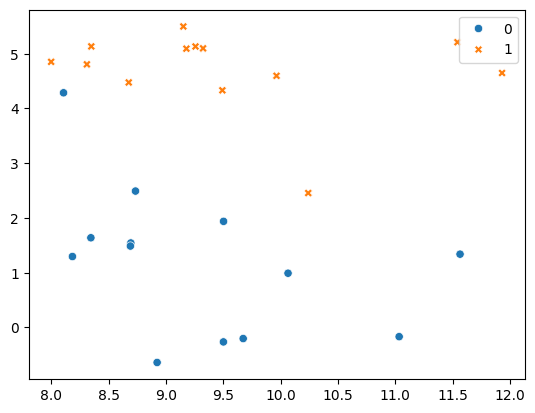

In [41]:
#part 2
g = sb.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)
plt.show()

Question 2 – k-NN – Generalization

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [43]:
#Part 2

cancer.keys()
# X = cancer.data
# y = cancer.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:
# Part 3
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, #X and y 
                                                    random_state=66, 
                                                    shuffle=True, 
                                                    stratify=cancer.target)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


In [45]:
# Part 4 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
# Part 5 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# Part 6 
knn.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [48]:
print("Train score", knn.score(X_train, y_train))
print("Test score", knn.score(X_test, y_test))
# formating numbers in Python
print("Train score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test, y_test)))

Train score 1.0
Test score 0.9020979020979021
Train score: 1.00
Test score: 0.90


In [49]:
# Step 7: Record the score for k=1 to 21
train_score = []
test_score = []

for k in range(1, 22):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    print(f"k: {k:2d} Train split: {knn.score(X_train, y_train):.2f} / Test split: {knn.score(X_test, y_test):.2f}")

k:  1 Train split: 1.00 / Test split: 0.90
k:  2 Train split: 0.98 / Test split: 0.89
k:  3 Train split: 0.96 / Test split: 0.92
k:  4 Train split: 0.96 / Test split: 0.92
k:  5 Train split: 0.95 / Test split: 0.92
k:  6 Train split: 0.95 / Test split: 0.94
k:  7 Train split: 0.94 / Test split: 0.93
k:  8 Train split: 0.94 / Test split: 0.93
k:  9 Train split: 0.93 / Test split: 0.92
k: 10 Train split: 0.94 / Test split: 0.92
k: 11 Train split: 0.93 / Test split: 0.92
k: 12 Train split: 0.93 / Test split: 0.92
k: 13 Train split: 0.94 / Test split: 0.92
k: 14 Train split: 0.94 / Test split: 0.92
k: 15 Train split: 0.94 / Test split: 0.92
k: 16 Train split: 0.94 / Test split: 0.92
k: 17 Train split: 0.94 / Test split: 0.92
k: 18 Train split: 0.94 / Test split: 0.92
k: 19 Train split: 0.94 / Test split: 0.92
k: 20 Train split: 0.94 / Test split: 0.92
k: 21 Train split: 0.94 / Test split: 0.92


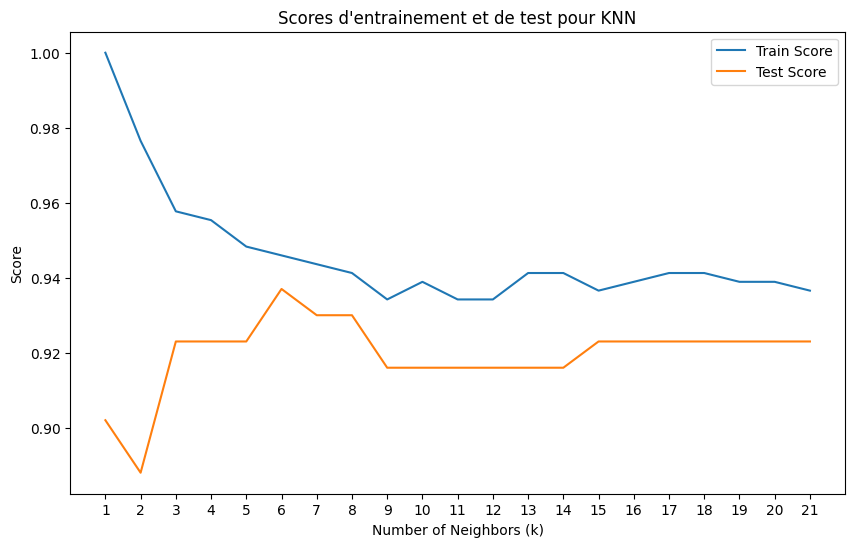

In [50]:
# Step 8: Plot the graph
k = list(range(1,22))
plt.figure(figsize=(10, 6))
plt.plot(k, train_score, label='Train Score')
plt.plot(k, test_score, label='Test Score')
plt.xticks(ticks = k)
plt.title('Scores d\'entrainement et de test pour KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.show()

#part 9
Ideally all the variables should hace been standardized, ie they should all have the same domain (for example 0-1 or 1-100) in order to computes distances accurancy 

## Question 3 – k-NN – Decision boundaries

In [51]:
# Part 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
print(X_test, "\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_test, "\n")

[[ 9.32298256  5.09840649]
 [ 8.30988863  4.80623966]
 [ 9.49123469  4.33224792]
 [ 9.67284681 -0.20283165]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [10.24028948  2.45544401]] 

[[11.54155807  5.21116083]
 [10.06393839  0.99078055]
 [ 9.49123469  4.33224792]
 [ 8.18378052  1.29564214]
 [ 8.30988863  4.80623966]
 [10.24028948  2.45544401]
 [ 8.34468785  1.63824349]] 



In [53]:
# Part 2
clf = KNeighborsClassifier(n_neighbors=3)
# Part 3
clf.fit(X_train, y_train)
# Part 4
print("Prédiction on the test set: ", clf.predict(X_test))
print("Expected values of the test set: ", y_test)
print("Train score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test score: {:.2f}".format(clf.score(X_test, y_test)))

Prédiction on the test set:  [1 0 1 0 1 0 0]
Expected values of the test set:  [1 0 1 0 1 1 0]
Train score: 0.95
Test score: 0.86


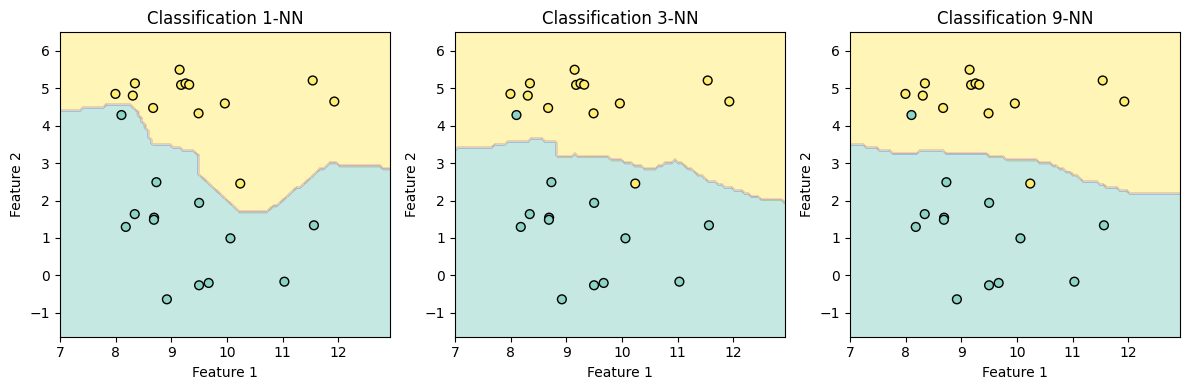

In [58]:
from sklearn.inspection import DecisionBoundaryDisplay

# 3 sous-graphiques sur une grille de 1x3, de taille 12x4 pouces
fig, sub = plt.subplots(1, 3, figsize=(12,4)) 
colorPalette = 'Set3'
X0, X1 = X[:, 0], X[:, 1]

# TODO définir K la liste des valeurs de k
K = [1, 3, 9]

for k, ax in zip(K, sub.flatten()):
    # TODO code pour créer le classifieur
    clf = KNeighborsClassifier(n_neighbors = k)
    # TODO code pour l'apprentissage du modèle
    clf.fit(X, y)
    
    # Code de visualisation
    DecisionBoundaryDisplay.from_estimator(clf,
                                           X,
                                           cmap=colorPalette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel='Feature 1',
                                           ylabel='Feature 2',
                                           alpha = 0.5)
    ax.scatter(X0, X1, c=y, cmap=colorPalette, s=40, edgecolors='k')
    ax.set_title("Classification {}-NN".format(k))
    
# on cache cellule du quadrillage si n'y a pas de sous-graphique dedans
for ax in sub.flatten()[len(K):]:
    ax.set_visible(False)    
    
plt.tight_layout()

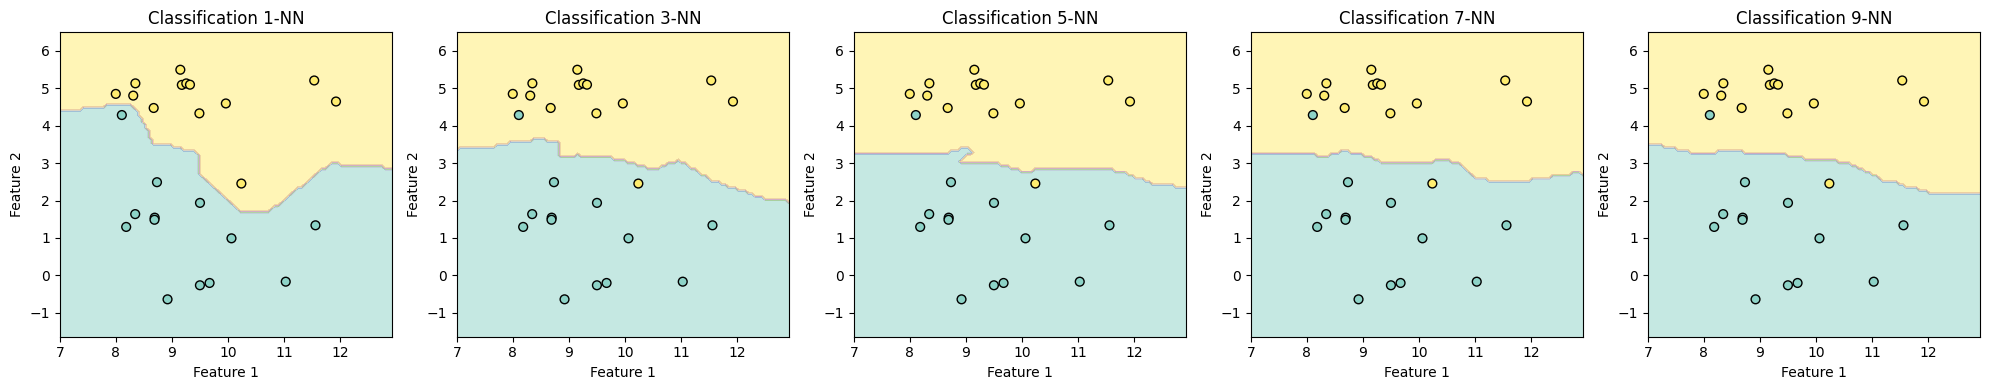

In [60]:
# 3 sous-graphiques sur une grille de 1x5, de taille 20x4 pouces
fig, sub = plt.subplots(1, 5, figsize=(20, 4)) 
colorPalette = 'Set3'
X0, X1 = X[:, 0], X[:, 1]

# Utiliser les 5 premières valeurs de K
K = [1, 3, 5, 7, 9]

for k, ax in zip(K, sub.flatten()):
    # Créer le classifieur
    clf = KNeighborsClassifier(n_neighbors=k)
    # Apprentissage du modèle
    clf.fit(X, y)
    
    # Code de visualisation
    DecisionBoundaryDisplay.from_estimator(clf,
                                           X,
                                           cmap=colorPalette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel='Feature 1',
                                           ylabel='Feature 2',
                                           alpha=0.5)
    ax.scatter(X0, X1, c=y, cmap=colorPalette, s=40, edgecolors='k')
    ax.set_title("Classification {}-NN".format(k))
    
# On cache cellule du quadrillage si n'y a pas de sous-graphique dedans
for ax in sub.flatten()[len(K):]:
    ax.set_visible(False)    
    
plt.tight_layout()
plt.show()

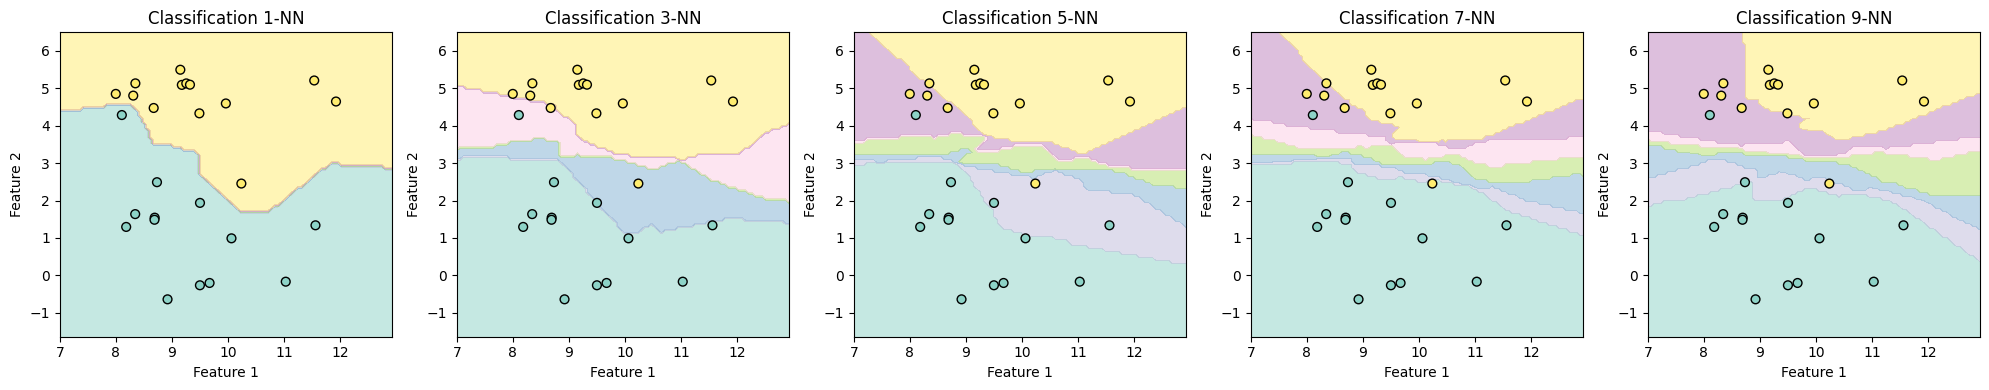

In [61]:
# 3 sous-graphiques sur une grille de 1x5, de taille 20x4 pouces
fig, sub = plt.subplots(1, 5, figsize=(20, 4)) 
colorPalette = 'Set3'
X0, X1 = X[:, 0], X[:, 1]

# Utiliser les 5 premières valeurs de K
K = [1, 3, 5, 7, 9]

for k, ax in zip(K, sub.flatten()):
    # Créer le classifieur
    clf = KNeighborsClassifier(n_neighbors=k)
    # Apprentissage du modèle
    clf.fit(X, y)
    
    # Code de visualisation avec response_method='predict_proba'
    DecisionBoundaryDisplay.from_estimator(clf,
                                           X,
                                           cmap=colorPalette,
                                           response_method="predict_proba",
                                           ax=ax,
                                           xlabel='Feature 1',
                                           ylabel='Feature 2',
                                           alpha=0.5)
    ax.scatter(X0, X1, c=y, cmap=colorPalette, s=40, edgecolors='k')
    ax.set_title("Classification {}-NN".format(k))
    
# On cache cellule du quadrillage si n'y a pas de sous-graphique dedans
for ax in sub.flatten()[len(K):]:
    ax.set_visible(False)    
    
plt.tight_layout()
plt.show()

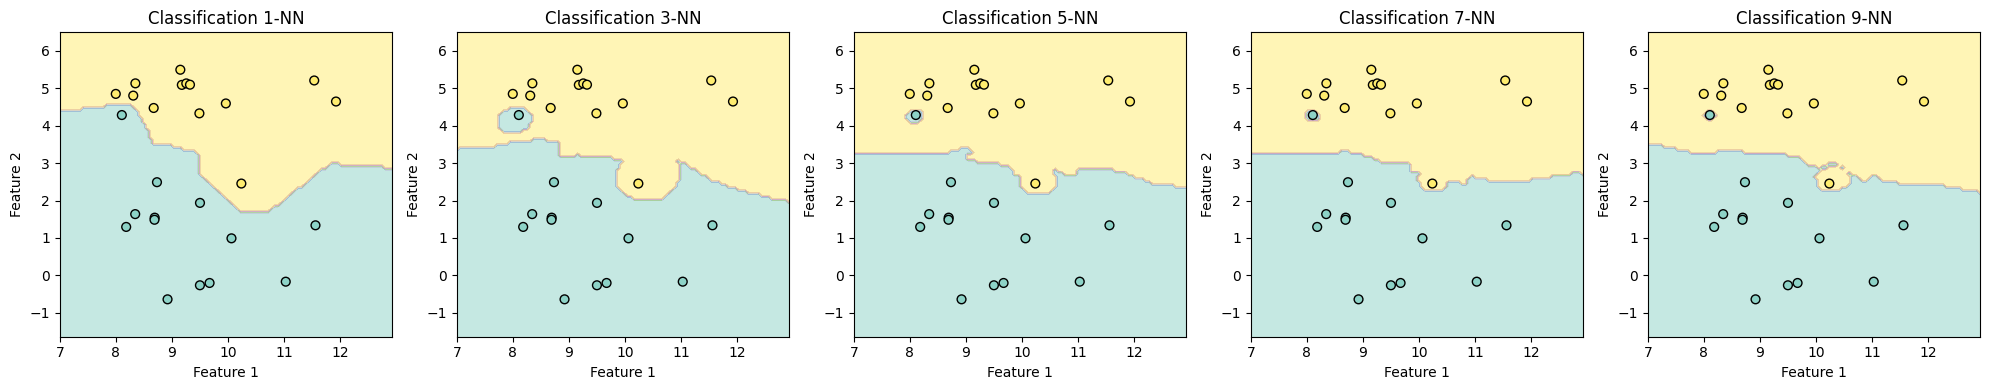

In [62]:
# 3 sous-graphiques sur une grille de 1x5, de taille 20x4 pouces
fig, sub = plt.subplots(1, 5, figsize=(20, 4)) 
colorPalette = 'Set3'
X0, X1 = X[:, 0], X[:, 1]

# Utiliser les 5 premières valeurs de K
K = [1, 3, 5, 7, 9]

for k, ax in zip(K, sub.flatten()):
    # Créer le classifieur avec weights='distance'
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    # Apprentissage du modèle
    clf.fit(X, y)
    
    # Code de visualisation avec response_method='predict'
    DecisionBoundaryDisplay.from_estimator(clf,
                                           X,
                                           cmap=colorPalette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel='Feature 1',
                                           ylabel='Feature 2',
                                           alpha=0.5)
    ax.scatter(X0, X1, c=y, cmap=colorPalette, s=40, edgecolors='k')
    ax.set_title("Classification {}-NN".format(k))
    
# On cache cellule du quadrillage si n'y a pas de sous-graphique dedans
for ax in sub.flatten()[len(K):]:
    ax.set_visible(False)    
    
plt.tight_layout()
plt.show()

## Question 4 – Linear Models – Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
# Load breast cancer dataset
cancer = load_breast_cancer()

# Split dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [71]:
lg = LogisticRegression(max_iter=10000) # C=1, penalty='l2'
# we increase max_iter to 10000 to avoid convergence warning
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [73]:
print("Train score: {:.10f}".format(lg.score(X_train, y_train)))
print("Test score: {:.10f}".format(lg.score(X_test, y_test)))

Train score: 0.9671361502
Test score: 0.9370629371


In [76]:
def LogReg(paramC, paramPenalty):
    lg = LogisticRegression(C=paramC, penalty=paramPenalty, max_iter=10000)
    lg.fit(X_train, y_train)
    print("Train score: {:.10f}".format(lg.score(X_train, y_train)))
    print("Test score: {:.10f}".format(lg.score(X_test, y_test)))
    return lg
model1 = LogReg(0.001, 'l2')
model2= LogReg(1, 'l2')
model3 = LogReg(100, 'l2')
LogReg(1, None)

Train score: 0.9507042254
Test score: 0.9300699301
Train score: 0.9671361502
Test score: 0.9370629371
Train score: 0.9812206573
Test score: 0.9300699301
Train score: 0.9882629108
Test score: 0.9160839161


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=10000, penalty=None)

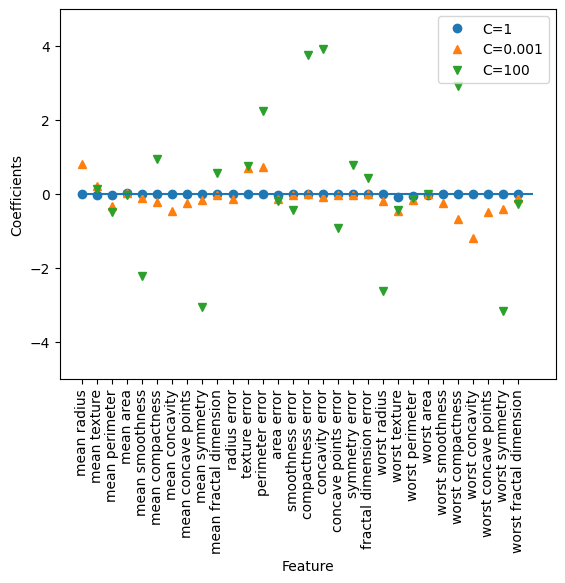

In [77]:
# Plotting the coefficients
plt.plot(model1.coef_.T, 'o', label="C=1")
plt.plot(model2.coef_.T, '^', label="C=0.001")
plt.plot(model3.coef_.T, 'v', label="C=100")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficients")
plt.legend()
plt.show()